In [11]:
# Importar las librerias que se van a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
from scipy import stats
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
# leer el archivo csv

df_train = pd.read_csv('/Users/miguelcamachosegura/Downloads/train.csv')
df_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
df_train.shape

(1460, 81)

In [7]:
df_train[['Id','SalePrice']]

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000
...,...,...
1455,1456,175000
1456,1457,210000
1457,1458,266500
1458,1459,142125


In [8]:
# el promedio de venta de las casas es

df_train['SalePrice'].mean()

180921.19589041095

In [13]:
# nos enfocamos en la columna SalePrice
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/miguelcamachosegura/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

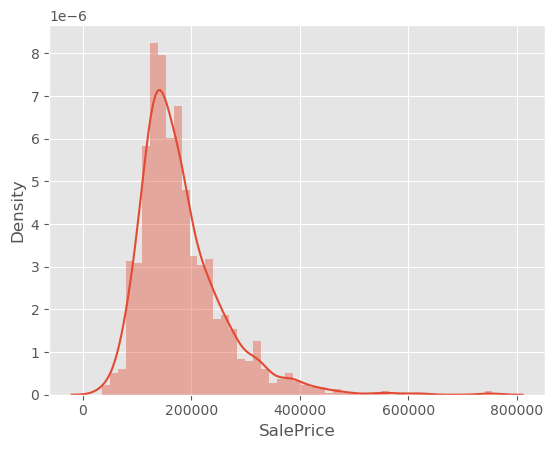

In [15]:
sns.distplot(df_train['SalePrice'])

In [23]:
# Podemos conocer el skewness y la kutosis de la grafica con .skew y .kurt
skew = df_train['SalePrice'].skew()
print ('El skew de la grafica es', skew)
kurt = df_train['SalePrice'].kurt()
print ('El kurt de la grafica es', kurt)

El skew de la grafica es 1.8828757597682129
El kurt de la grafica es 6.536281860064529


In [24]:
# vamos a hacer una grafica de dispersion para ver la correlacion entre precio de venta y area de la casa

area_casa ='GrLivArea'

In [26]:
data =pd.concat([df_train['SalePrice'],df_train[area_casa]],axis= 1)
data.head(20)

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198
5,143000,1362
6,307000,1694
7,200000,2090
8,129900,1774
9,118000,1077


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

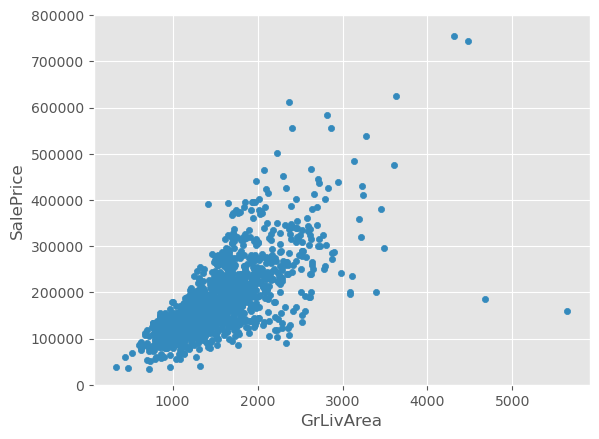

In [28]:
data.plot.scatter(x= area_casa, y ='SalePrice', ylim=(0,800000))

In [31]:
# ahora haremos el mismo analisis para la relacion de area de sotano y precio de venta

sotano = 'TotalBsmtSF'
data =pd.concat([df_train['SalePrice'],df_train[sotano]],axis=1)
data.head(20)

,SalePrice,TotalBsmtSF
0,208500,856
1,181500,1262
2,223500,920
3,140000,756
4,250000,1145
5,143000,796
6,307000,1686
7,200000,1107
8,129900,952
9,118000,991


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

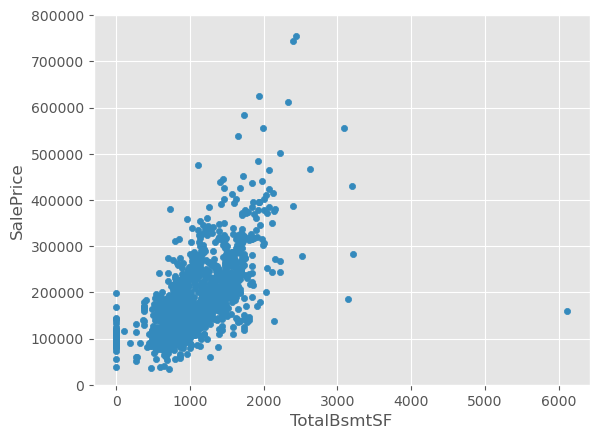

In [32]:
data.plot.scatter (x=sotano,y='SalePrice', ylim=(0,800000))

In [34]:
# ahora realizaremos un analisis categorico entre precio/calidad de la casa

calidad ='OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[calidad]],axis=1)
data.head(20)

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8
5,143000,5
6,307000,8
7,200000,7
8,129900,7
9,118000,5


(-0.5, 9.5, 0.0, 800000.0)

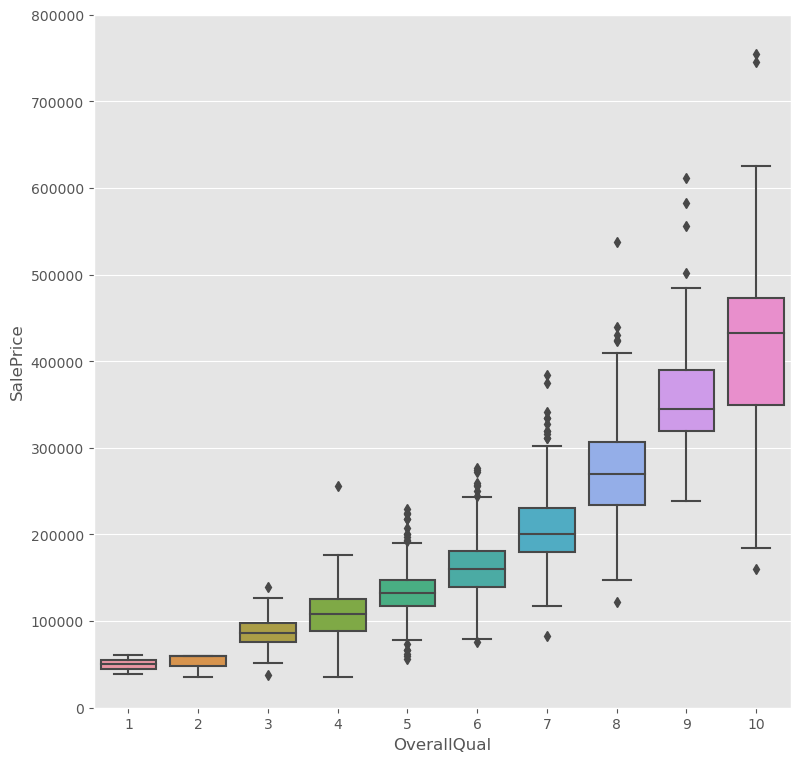

In [38]:
#definimos los parametros para armar la grafica en un subplot
f, ax = plt.subplots(figsize = (9,9))
fig = sns.boxplot(x=calidad, y='SalePrice',data = data)
fig.axis(ymin=0,ymax=800000)

In [39]:
#ahora haremos el mismo analisis para comparar el año de venta con el precio
año_conts ='YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[año_conts]],axis=1)
data.head(20)

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000
5,143000,1993
6,307000,2004
7,200000,1973
8,129900,1931
9,118000,1939


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

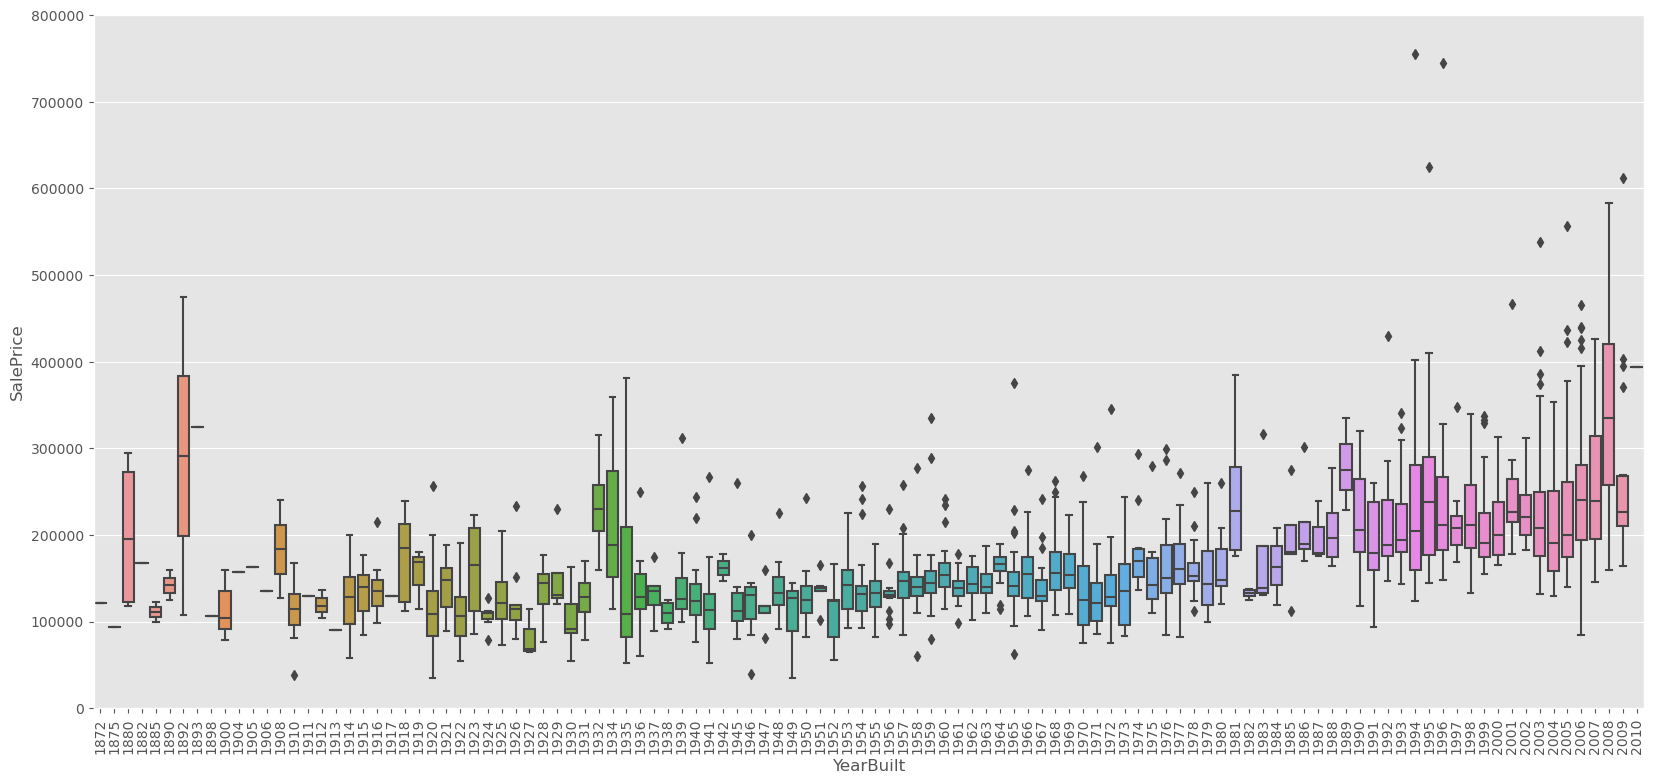

In [44]:

#definimos los parametros para armar la grafica en un subplot
f, ax = plt.subplots(figsize = (20,9))
fig = sns.boxplot(x=año_conts, y='SalePrice',data = data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)

<AxesSubplot:>

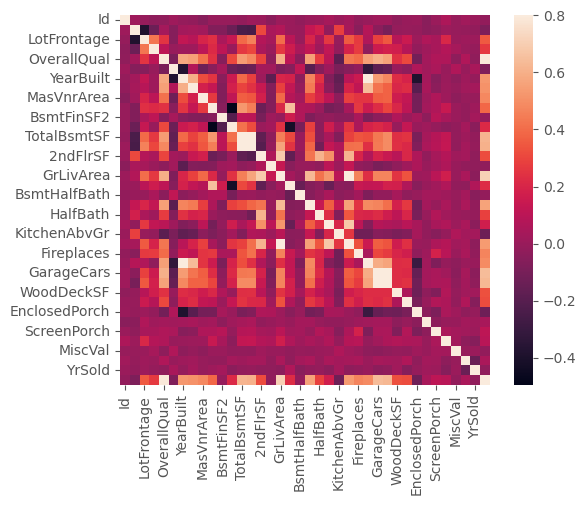

In [54]:
# Ahora haremos una matriz de correlacion

corr_mat= df_train.corr()
sns.heatmap(corr_mat,vmax=.8,square=True)

In [ ]:
# ahora haremos una grafica usando los valores mas altos de correlacion con SalePrice


In [75]:
i= 10


In [76]:
cols=corr_mat.nlargest(i,'SalePrice')['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [77]:
matrix = np.corrcoef(df_train[cols].values.T)
matrix

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

In [63]:
sns.set(font_scale=1.25)

Text(0.5, 1.0, 'Matriz de correlacion para SalePrice')

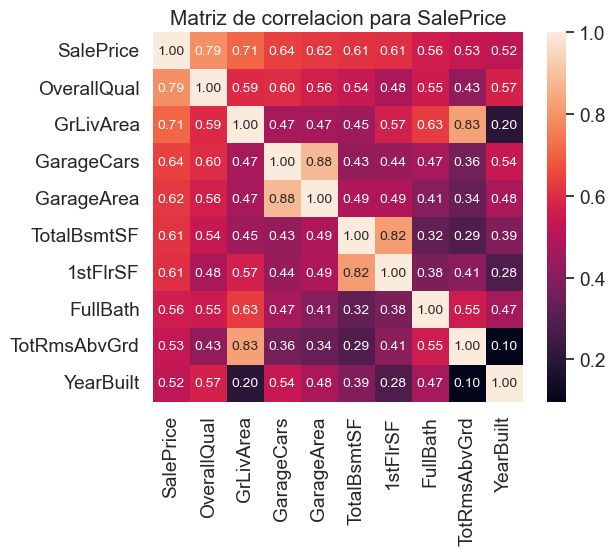

In [78]:
sns.heatmap(matrix, annot=True, cbar=True,square=True, fmt='.2f', annot_kws={"size":10},yticklabels=cols.values,xticklabels=cols.values)
plt.title('Matriz de correlacion para SalePrice')

In [ ]:
# Concluimos que las 10 variables que mas se correlacionan con el precio de venta de casa que son: calidad en general, area totaal, espacio del garage, Area del sotano, area del primer piso,baños completos,año de construccion

In [ ]:
# Por ultimo contruiremos una grafica de dispersion usando todas las variables que se correlecionan con SalePrice en una sola grafica

In [79]:
sns.set()

In [80]:
cols= ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']

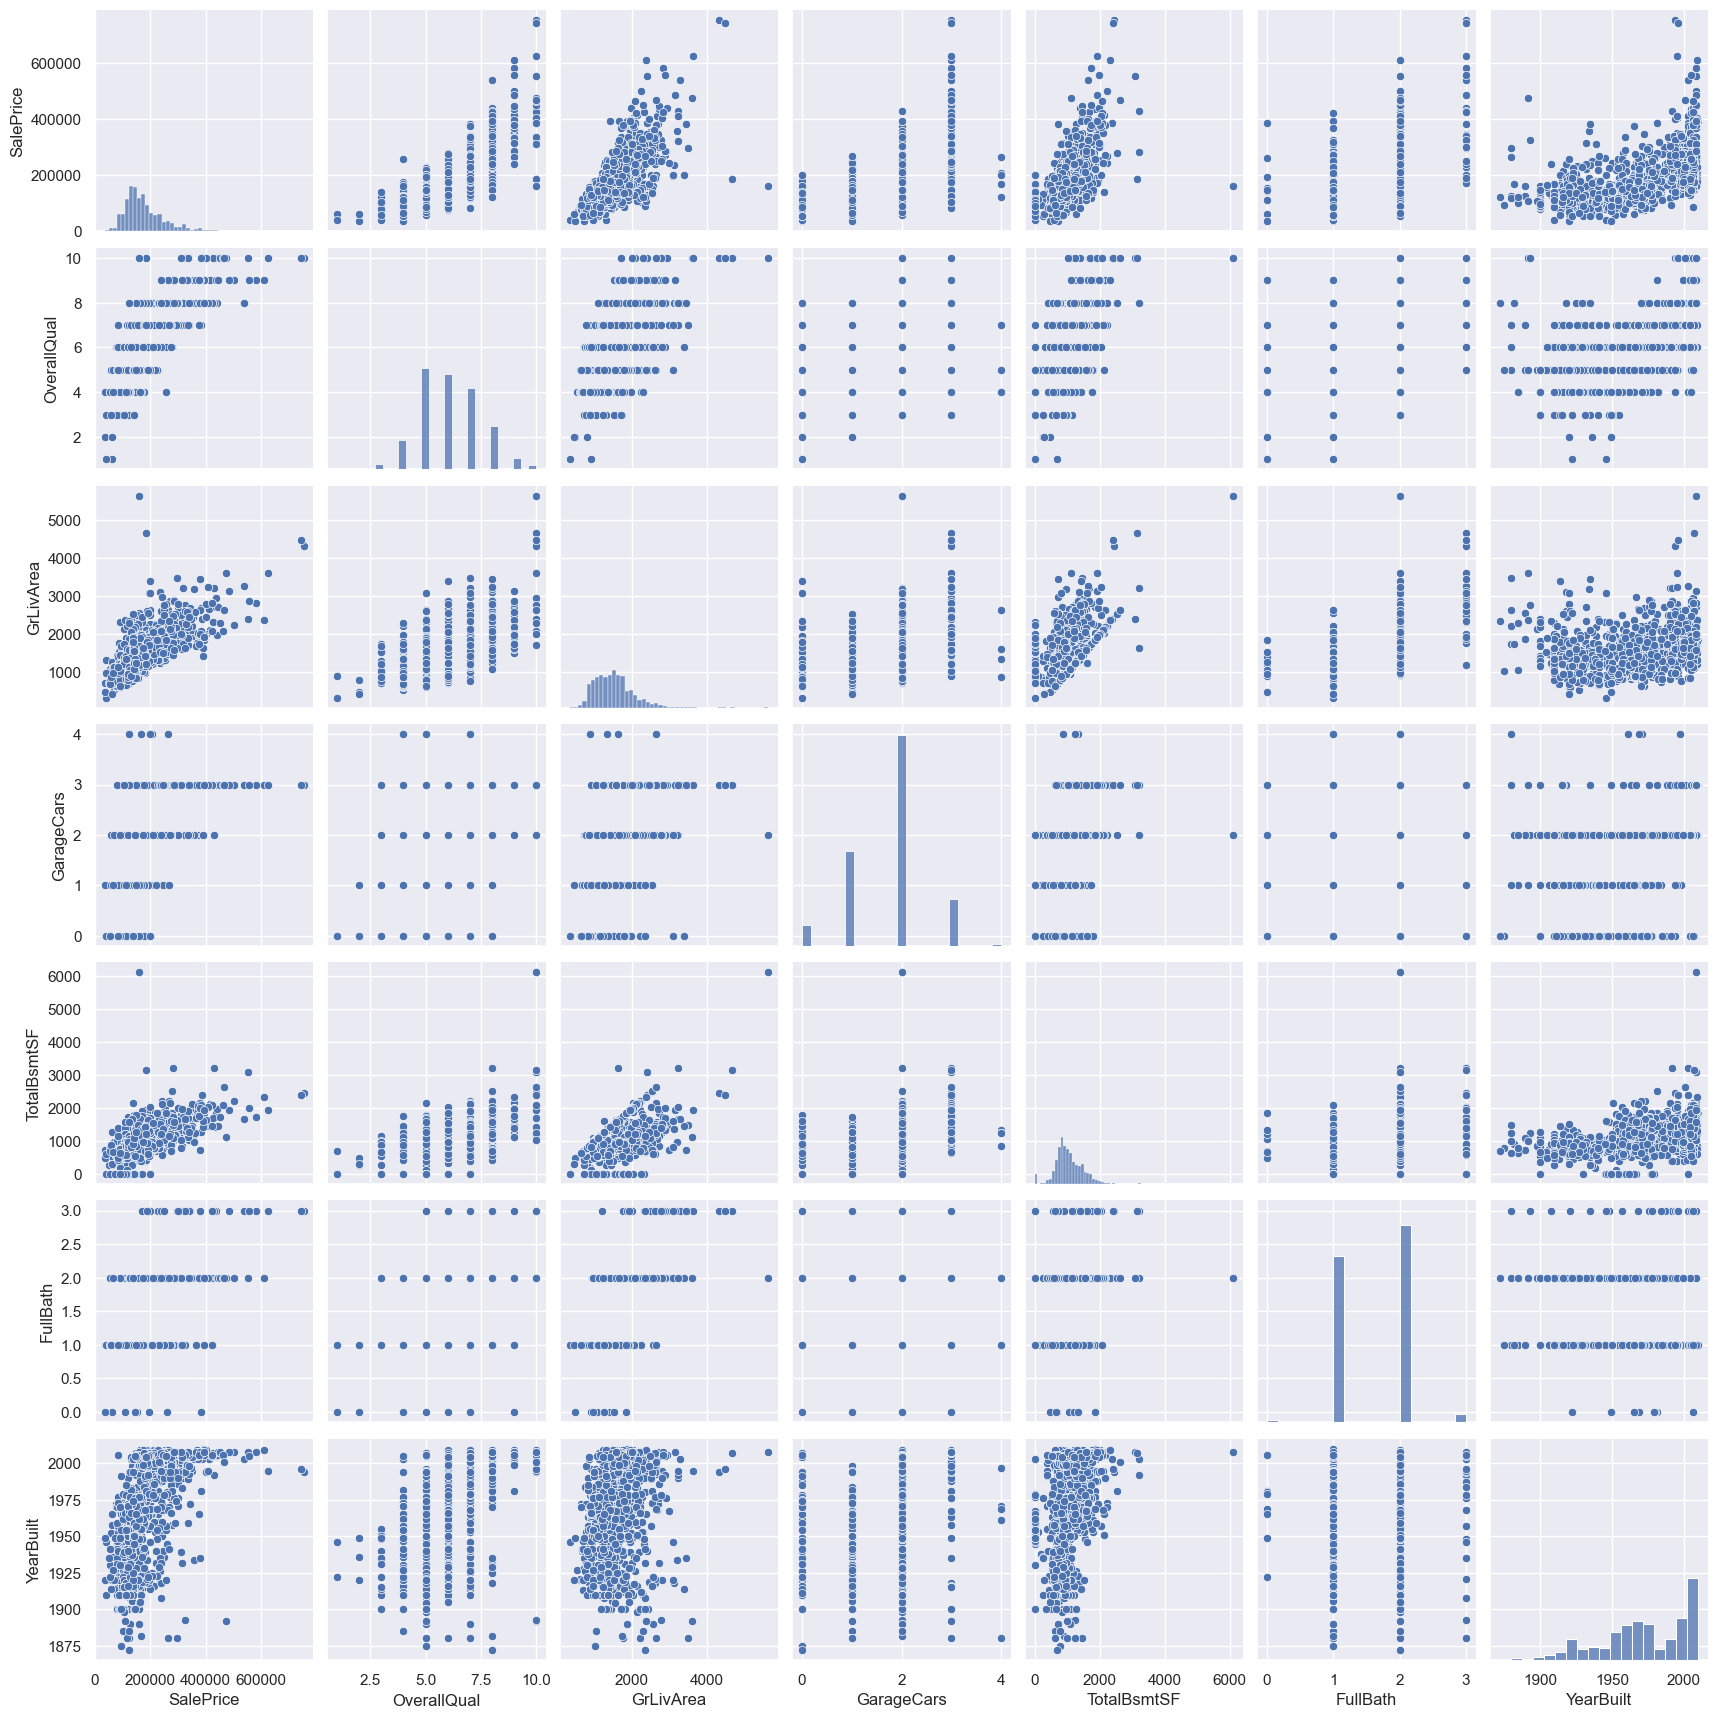

In [84]:
sns.pairplot(df_train[cols], height=2.5)
plt.show()